## Deploy a Model with Python Streamlit

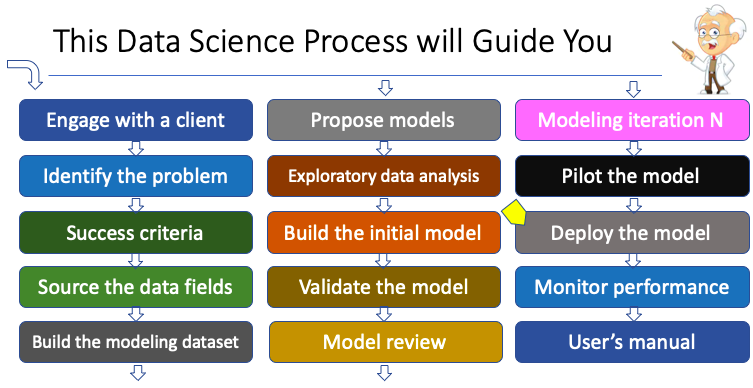

In [5]:
pip install streamlit


  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13454 sha256=e3ccd4a9fd671caf463975f2679cb1f36823d129304ef7192e265d1697f47849
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


In [ ]:
# Numerical Variables: Obtain the Boundary Values

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
path = ''
df = pd.read_csv(path + 'd:/data/application_train.csv')
df = df.sample(frac=0.1) # Take some records just to build a toy model
X_train, X_test, Y_train, Y_test = train_test_split(df[features],
     df['TARGET'],random_state=0)
     
df[features] = ['APARTMENTS_AVG','LIVINGAPARTMENTS_AVG','OCCUPATION_TYPE']

# Impute with the mean of the training data
# Keep the same mean to impute the test data or any future data
APARTMENTS_AVG_MEAN = X_train['APARTMENTS_AVG'].mean()
APARTMENTS_AVG_MAX = X_train['APARTMENTS_AVG'].mean()
APARTMENTS_AVG_MIN = X_train['APARTMENTS_AVG'].min()
LIVINGAPARTMENTS_AVG_MEAN = X_train['LIVINGAPARTMENTS_AVG'].mean()
LIVINGAPARTMENTS_AVG_MAX = X_train['LIVINGAPARTMENTS_AVG'].max()
LIVINGAPARTMENTS_AVG_MIN = X_train['LIVINGAPARTMENTS_AVG'].min()

mean_values = {'APARTMENTS_AVG': APARTMENTS_AVG_MEAN, 'LIVINGAPARTMENTS_AVG': LIVINGAPARTMENTS_AVG_MEAN}
X_train = X_train.fillna(value=mean_values)
X_test = X_test.fillna(value=mean_values)

In [ ]:
# Categorical Variables: Able to Include New Categories

# Categorical 
X_train['OCCUPATION_TYPE'].value_counts()
OCCUPATION_list  = ['Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff',
'Accountants','Medicine staff','Security staff','Cooking staff','Cleaning staff']

X_train['OCCUPATION_GRP'] = np.where(X_train['OCCUPATION_TYPE'].isin(OCCUPATION_list), X_train['OCCUPATION_TYPE'], 'OTHER')
X_test['OCCUPATION_GRP'] = np.where(X_test['OCCUPATION_TYPE'].isin(OCCUPATION_list), X_test['OCCUPATION_TYPE'], 'OTHER')
X_train = X_train.drop('OCCUPATION_TYPE',axis=1)
X_test = X_test.drop('OCCUPATION_TYPE',axis=1)
X_train['OCCUPATION_GRP'].value_counts(dropna=False)

# Get_Dummy for One-Hot #
# Fill the blank with "_" 
def getDummy(df,var):
    df[var] = df[var].str.replace(' ','_')
    df[var] = df[var].str.replace('/','_')
    dummies = pd.get_dummies(df[var])
    df2 = pd.concat([df, dummies], axis=1)
    df2 = df2.drop([var], axis=1)
    return(df2)
    
X_train = getDummy(X_train,'OCCUPATION_GRP')
X_test = getDummy(X_test,'OCCUPATION_GRP')
np.sort(X_train.columns)

In [ ]:
# Modeling and Save the Modelrom sklearn.tree import DecisionTreeClassifier # for classification

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature', figsize=(4,3),fontsize=6)

# Predict a few records
predictions = dtree.predict_proba(X_test[0:5])[:,1]
predictions

# Save the model
import pickle 
# save the model to disk
modelname = path + '/toymodel.pkl'
pickle.dump(dtree, open(modelname, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(modelname, 'rb'))
predictions = loaded_model.predict_proba(X_test[0:1])[:,1]
predictions

rom sklearn.tree import DecisionTreeClassifier # for classification

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
# Then, train the model.
dtree.fit(X_train,Y_train)

importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature', figsize=(4,3),fontsize=6)

# Predict a few records
predictions = dtree.predict_proba(X_test[0:5])[:,1]
predictions

# Save the model
import pickle 
# save the model to disk
modelname = path + '/toymodel.pkl'
pickle.dump(dtree, open(modelname, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(modelname, 'rb'))
predictions = loaded_model.predict_proba(X_test[0:1])[:,1]
predictions

In [ ]:
#Python Streamlit Code
#Let me explain the code.
#Line 10–13 loads the model,
#Line 20–22 provides two slide bars for users to enter values for the numerical variables,
#Line 44–83 lets users select a category, and
#Line 85–107 provides the prediction if the button is clicked.

###############################
# This program lets you       #
# - enter values in Streamlit #
# - get prediction            #  
###############################
import pickle
import pandas as pd
import streamlit as st
 
# loading the model
path = ''
modelname = path + '/toymodel.pkl'
loaded_model = pickle.load(open(modelname, 'rb'))
      
#############  
# Main page #
#############                
st.write("The model prediction")     

# ------------------------------------------------
#  provides two slide bars for users to enter values for the numerical variables(next 3 lines)
LIVINGAPARTMENTS_AVG_MIN = 0.0
LIVINGAPARTMENTS_AVG_MAX = 1.0
APARTMENTS_AVG_MIN = 0.0
## --------------------------------------------------##
APARTMENTS_AVG_MAX = 0.11697126743049956

# Get input values - numeric variables
LIVINGAPARTMENTS_AVG = st.slider('Please enter the living apartments:',
                                 min_value = LIVINGAPARTMENTS_AVG_MIN,
                                 max_value = LIVINGAPARTMENTS_AVG_MAX
                                )
APARTMENTS_AVG = st.slider('Please enter the apartment average:',
                                 min_value = APARTMENTS_AVG_MIN,
                                 max_value = APARTMENTS_AVG_MAX
                                )

# Set dummy variables to zero    
cat_list = ['Accountants', 'Cleaning_staff', 'Cooking_staff',
       'Core_staff', 'Drivers', 'High_skill_tech_staff',
       'Laborers', 'Managers', 'Medicine_staff',
       'OTHER', 'Sales_staff', 'Security_staff']         
for i in cat_list:
       exec("%s = %d" % (i,0)) # The exec() command makes a value as the variable name
               

## ------------------------------------------------------- ##           
#  lets users select a category   

# Enter data for prediction 
Occupation = st.selectbox('Please choose Your Occupation',
                              ('Accountants',
                               'Cleaning_staff',
                               'Cooking_staff',
                               'Core_staff', 
                               'Drivers', 
                               'High_skill_tech_staff',
                               'Laborers', 
                               'Managers', 
                               'Medicine_staff',
                               'Sales_staff', 
                               'Security_staff',
                               'OTHER')
                             )
               
if Occupation=='Accountants':
        Accountants =1
elif Occupation=='Cleaning_staff':
        Cleaning_staff =1
elif Occupation=='Cooking_staff':
        Cooking_staff =1
elif Occupation=='Core_staff':
        Core_staff =1
elif Occupation=='Drivers':
        Drivers =1
elif Occupation=='High_skill_tech_staff':
        High_skill_tech_staff =1
elif Occupation=='Laborers':
        Laborers =1
elif Occupation=='Managers':
        Managers =1
elif Occupation=='Medicine_staff':
        Medicine_staff =1
elif Occupation=='Sales_staff':
        Sales_staff =1
elif Occupation=='Security_staff':
        Security_staff =1
else: 
        OTHER =1
## -------------------------------------------------- ##               

## provides the prediction if the button is clicked ##

# when 'Predict' is clicked, make the prediction and store it 
if st.button("Get Your Prediction"): 
    
    X = pd.DataFrame({'APARTMENTS_AVG':[APARTMENTS_AVG],
                      'LIVINGAPARTMENTS_AVG':[LIVINGAPARTMENTS_AVG], 
                      'Accountants':[Accountants], 
                      'Cleaning_staff':[Cleaning_staff], 
                      'Cooking_staff':[Cooking_staff],
                      'Core_staff':[Core_staff],
                      'Drivers':[Drivers], 
                      'High_skill_tech_staff':[High_skill_tech_staff],
                      'Laborers':[Laborers], 
                      'Managers':[Managers], 
                      'Medicine_staff':[Medicine_staff],
                      'Sales_staff':[Sales_staff], 
                      'Security_staff':[Security_staff],
                      'OTHER':[OTHER] 
                     })
               
    # Making predictions            
    prediction = loaded_model.predict_proba(X)[:,1] # The model produces (p0,p1), we want p1.

    st.success('Your Target is {}'.format(prediction))

In [14]:
# How to run it ?

Open a command prompt and type:
streamlit run deploy_model.py